### Debugging outputs

2.  

(a) new (x,y) position: [0.15 0.9 ]

(b) Take 41 steps to converge. Converge to point [-0.99999982  0.99999455] with value -2.9999999999721534.  took: 0.0020 sec




### Helper functions

A timing decorator. Put at the beginning of your function so that every time your function is called it'll print out the execution time

In [1]:
import time
import numpy as np
from scipy.optimize import minimize 
def timeit(f):

    def timed(*args, **kw):

        ts = time.time()
        result = f(*args, **kw)
        te = time.time()

        print('func:%r took: %2.4f sec' % (f.__name__,  te-ts))
        return result

    return timed

A function that help to visualize the optimization pathway:

In [2]:
%matplotlib notebook
def draw_path(func,path,x_min=-2,x_max=2,y_min=-2,y_max=2):
    a=np.linspace(x_min,x_max,100)
    b=np.linspace(y_min,y_max,100)
    x,y=np.meshgrid(a,b)
    z=func((x,y))
    fig,ax=plt.subplots()
    my_contour=ax.contour(x,y,z,50)
    plt.colorbar(my_contour)
    ax.plot(path[:,0],path[:,1])

### Templates for algorithm you need to implement

$𝑓(𝑥, 𝑦) = 𝑥^4 − 𝑥^2 + 𝑦^2 + 2𝑥𝑦 − 2$ over range x = [- 2,2] and y = [-2,2]

Starting from point point (1.5,1.5), and with stepsize =0.1,
determine new (𝑥, 𝑦) position using one step of the steepest descent algorithm (check against the debugging output). Is it a good optimization step? Depending
on this outcome, how will you change the step size in the next step?


In [3]:
def func_xy(in_xy):
    return ((in_xy[0]**4) - (in_xy[0]**2) + (in_xy[1]**2) + (2 * in_xy[0] *in_xy[1]) - 2)

In [4]:
def df_dx(inxy):
    return (4*(inxy[0]**3) - (2*inxy[0]) + 2*inxy[1])
def df_dy(inxy):
    return (2*inxy[1] + 2*inxy[0])
def df_dxy(inxy):
    return np.array([(4*(inxy[0]**3) - (2*inxy[0]) + 2*inxy[1]), (2*inxy[1] + 2*inxy[0])])

In [5]:
from pylab import *
import numpy.linalg as LA
@timeit
def steepest_descent(func,first_derivative,starting_point,stepsize,tol, cnt_max):
    count=0
    visited=[]
    while LA.norm(first_derivative(starting_point)) > tol and count < cnt_max: 
        visited.append(starting_point)
        # evaluate the gradient at starting point
        deriv = first_derivative(starting_point)
        
        # calculate new point position
        new_point = starting_point - (stepsize * deriv)
        if func(new_point) < func(starting_point):
            # the step makes function evaluation lower - it is a good step. what do you do?
            stepsize = 1.2 * stepsize
            starting_point = new_point
        else:
            # the step makes function evaluation higher - it is a bad step. what do you do?
            stepsize = 0.5 * stepsize
        count+=1
    # return the results
    return {"x":starting_point,"evaluation":func(starting_point),"path":np.asarray(visited), "steps" : count}

## 2a:

In [6]:
#Works with first step 
initial = np.array([1.5,1.5])
steepest_descent(func_xy, df_dxy, initial, 0.1, 1e-5, 2)

func:'steepest_descent' took: 0.0004 sec


{'x': array([-0.03162,  0.648  ]),
 'evaluation': -1.6220743447511694,
 'path': array([[1.5 , 1.5 ],
        [0.15, 0.9 ]]),
 'steps': 2}

In [7]:
func_xy(initial)

7.5625

Yes, it is a good step since the function value decreased from its initial value, as determined by the start point of [1.5, 1.5], of 7.5625 to -1.622. Because of this good outcome, the stepsize will be scaled up by 1.2 so instead of being 0.1, it will now be 0.12.

## 2b:

In [8]:
des_res = steepest_descent(func_xy, df_dxy, initial, 0.1, 1e-5, 1e6)
print(des_res)

func:'steepest_descent' took: 0.0014 sec
{'x': array([-0.99999852,  0.99999607]), 'evaluation': -2.999999999985186, 'path': array([[ 1.5       ,  1.5       ],
       [ 0.15      ,  0.9       ],
       [-0.03162   ,  0.648     ],
       [-0.22733235,  0.47048256],
       [-0.4603766 ,  0.38644985],
       [-0.73063964,  0.41710875],
       [-0.91361447,  0.57314178],
       [-0.89067253,  0.77647099],
       [-0.89067253,  0.77647099],
       [-0.98168777,  0.81739147],
       [-0.94167921,  0.88803587],
       [-1.0240441 ,  0.91571465],
       [-1.0240441 ,  0.91571465],
       [-0.95964931,  0.94925202],
       [-1.01216804,  0.95311466],
       [-1.01216804,  0.95311466],
       [-0.98795692,  0.96627781],
       [-0.99481157,  0.9720766 ],
       [-0.99412388,  0.97937406],
       [-0.99741632,  0.98505533],
       [-0.99646125,  0.99076871],
       [-1.00111334,  0.9939261 ],
       [-1.00111334,  0.9939261 ],
       [-0.99723697,  0.99631795],
       [-1.00126535,  0.99668496],
 

<IPython.core.display.Javascript object>


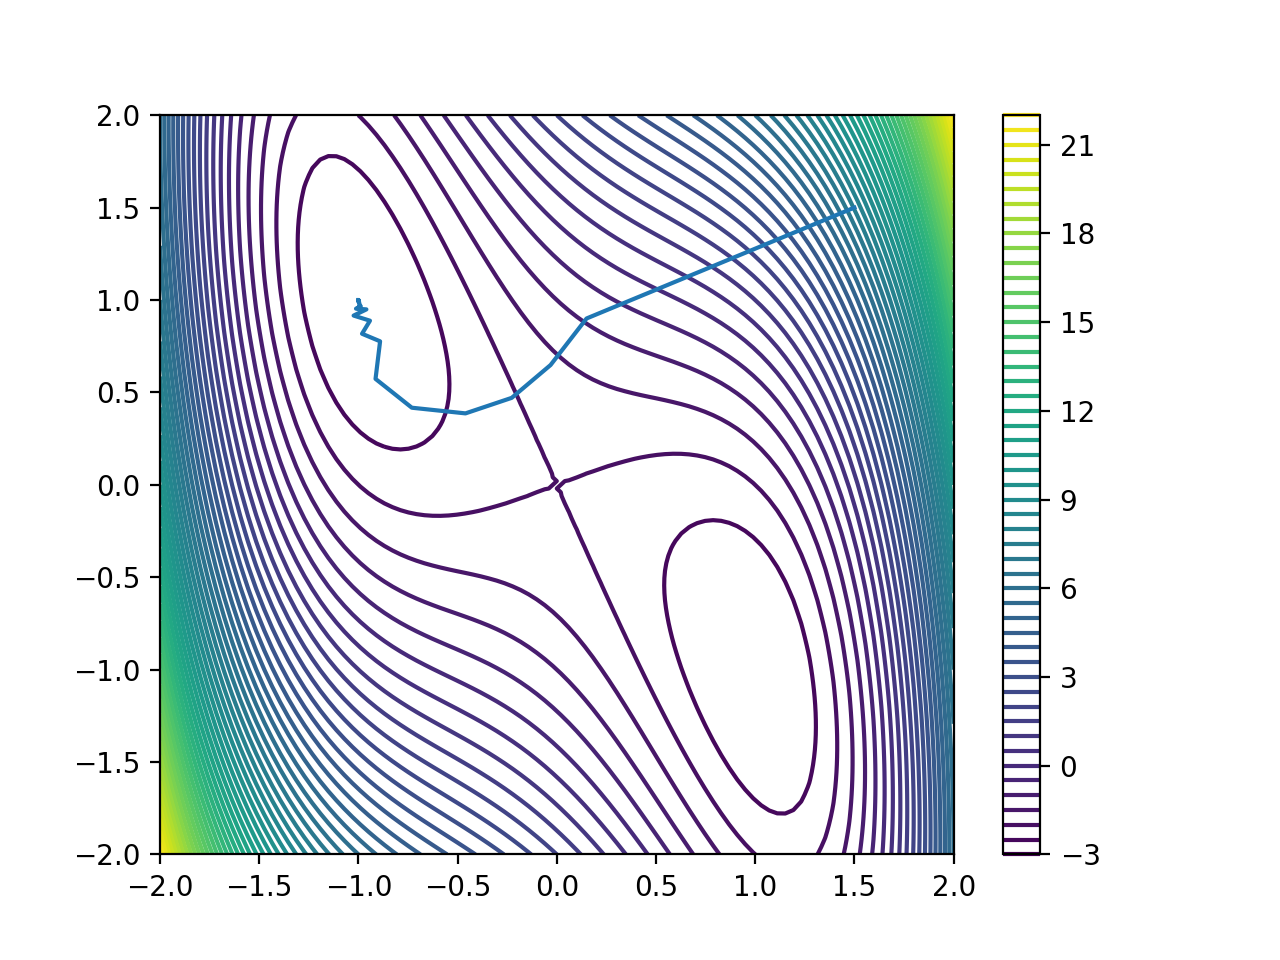

In [9]:
draw_path(func_xy, des_res['path'])

I converged to the same point and have the same function evaluation as the debugging output. However, I am taking 10 more steps than the debugging output has listed, but the function is taking less time. I am unsure as to where the 10 extra steps are occurring, as the tolerance and initial step size match the problem's parameters.  

## 2c:

In [10]:
min_res = minimize(func_xy, initial, method='BFGS', tol= 1e-5)
display(min_res)
funcxy_min_val = min_res['x']
display('the minimum is ' + str(funcxy_min_val))

      fun: -2.9999999999998255
 hess_inv: array([[ 0.12457729, -0.12457659],
       [-0.12457659,  0.62569812]])
      jac: array([-1.63912773e-06, -2.98023224e-08])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 7
     njev: 8
   status: 0
  success: True
        x: array([ 0.99999979, -0.9999998 ])

'the minimum is [ 0.99999979 -0.9999998 ]'

In [11]:
min_res = minimize(func_xy, initial, method='CG', tol = 1e-5)
display(min_res)
funcxy_min_val = min_res['x']
display('the minimum is ' + str(funcxy_min_val))

     fun: -2.99999999999959
     jac: array([ 2.08616257e-07, -1.10268593e-06])
 message: 'Optimization terminated successfully.'
    nfev: 78
     nit: 9
    njev: 26
  status: 0
 success: True
       x: array([-0.99999984,  0.99999929])

'the minimum is [-0.99999984  0.99999929]'

Based on number of iterations, BFGS is most efficient, CG is second most efficient, and steepest descents is last in efficiency. BFGS only took 7 steps, CG came in second with 9 steps, and steepest descents was not even close with taking 51 steps. BFGS and CG are more efficient than steepest descents and BFGS is slightly more efficient than CG.   